<a href="https://colab.research.google.com/github/songseunghei/DeepLearning/blob/main/wordEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data()
print('훈련용 리뷰 개수:{}'.format(len(X_train)))
print('테스트용 리뷰 개수:{}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리:{}'.format(num_classes))

17464789/17464789 [==============================] - 2s 0us/step
훈련용 리뷰 개수:25000
테스트용 리뷰 개수:25000
카테고리:2


In [2]:
print('첫번째 훈련용 리뷰:', X_train[0])
print('첫번째 훈련용 리뷰의 레이블:' ,y_train[0])


첫번째 훈련용 리뷰: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블: 1


In [3]:
word2id = imdb.get_word_index()
id2word={word:id for id,word in word2id.items()}
for i in range(1,21):
  print(id2word[i], end='/')

1641221/1641221 [==============================] - 1s 1us/step
the/and/a/of/to/is/br/in/it/i/this/that/was/as/for/with/movie/but/film/on/

In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras import preprocessing

#사전의 크기(사전에 있는 단어 개수)
dic_siz=10000
#샘플의 크기
sample_siz=512
(x_train, y_train),(x_test,y_test) = imdb.load_data(num_words=dic_siz)

#16차원의 임베딩공간
embed_space_dim=16
x_train=preprocessing.sequence.pad_sequences(x_train, maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

Epoch 1/20
391/391 - 53s - loss: 0.4363 - accuracy: 0.7678 - val_loss: 0.3041 - val_accuracy: 0.8694 - 53s/epoch - 136ms/step
Epoch 2/20
391/391 - 25s - loss: 0.1605 - accuracy: 0.9424 - val_loss: 0.3146 - val_accuracy: 0.8725 - 25s/epoch - 64ms/step
Epoch 3/20
391/391 - 17s - loss: 0.0524 - accuracy: 0.9853 - val_loss: 0.3797 - val_accuracy: 0.8638 - 17s/epoch - 43ms/step
Epoch 4/20
391/391 - 9s - loss: 0.0128 - accuracy: 0.9985 - val_loss: 0.4488 - val_accuracy: 0.8651 - 9s/epoch - 23ms/step
Epoch 5/20
391/391 - 9s - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.4955 - val_accuracy: 0.8633 - 9s/epoch - 23ms/step
Epoch 6/20
391/391 - 8s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5225 - val_accuracy: 0.8647 - 8s/epoch - 20ms/step
Epoch 7/20
391/391 - 7s - loss: 7.7784e-04 - accuracy: 1.0000 - val_loss: 0.5492 - val_accuracy: 0.8645 - 7s/epoch - 17ms/step
Epoch 8/20
391/391 - 7s - loss: 4.9021e-04 - accuracy: 1.0000 - val_loss: 0.5715 - val_accuracy: 0.8653 - 7s/epoch - 17ms/step
E

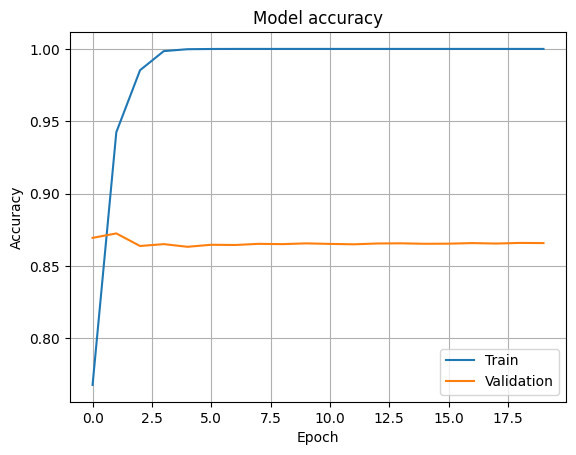

In [6]:
#신경망 모델 설계와 학습
embed=Sequential()
#input_dim차원을 output_dim차원으로 축소시킴
embed.add(Embedding(input_dim=dic_siz,output_dim = embed_space_dim, input_length=sample_siz))
embed.add(Flatten())
embed.add(Dense(32,activation='relu'))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=2)

embed.summary()

#모델 평가
res=embed.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

#학습곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

In [9]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

#사전의 크기, 사전에 있는단어의 개수
dic_siz=10000
sample_siz=512

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=dic_siz)

embed_space_dim=16

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

#검증집합에 대한 정확률을 조기 멈춤기준으로 사용
#5세대 동안 성능향상 없으면 멈춤
#가장 높은 성능을 발휘했을때의 가중치를 취함
early=EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

#신경망 모델의 설계와 학습(LSTM층 포함)
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz, output_dim=embed_space_dim, input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
#훈련집합의 20%떼어 검증집합으로 사용 콜백함수를 통해 조기 멈춤 적용
hist=embed.fit(x_train,y_train,epochs=20, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early])

Epoch 1/20
313/313 - 35s - loss: 0.4810 - accuracy: 0.7577 - val_loss: 0.4291 - val_accuracy: 0.8288 - 35s/epoch - 110ms/step
Epoch 2/20
313/313 - 20s - loss: 0.2559 - accuracy: 0.9010 - val_loss: 0.2960 - val_accuracy: 0.8808 - 20s/epoch - 63ms/step
Epoch 3/20
313/313 - 16s - loss: 0.1869 - accuracy: 0.9335 - val_loss: 0.3028 - val_accuracy: 0.8804 - 16s/epoch - 50ms/step
Epoch 4/20
313/313 - 10s - loss: 0.1695 - accuracy: 0.9402 - val_loss: 0.3603 - val_accuracy: 0.8544 - 10s/epoch - 31ms/step
Epoch 5/20
313/313 - 10s - loss: 0.1175 - accuracy: 0.9599 - val_loss: 0.3761 - val_accuracy: 0.8648 - 10s/epoch - 31ms/step
Epoch 6/20
313/313 - 9s - loss: 0.0900 - accuracy: 0.9721 - val_loss: 0.3826 - val_accuracy: 0.8708 - 9s/epoch - 28ms/step
Epoch 7/20
313/313 - 9s - loss: 0.1044 - accuracy: 0.9654 - val_loss: 0.4102 - val_accuracy: 0.8634 - 9s/epoch - 29ms/step


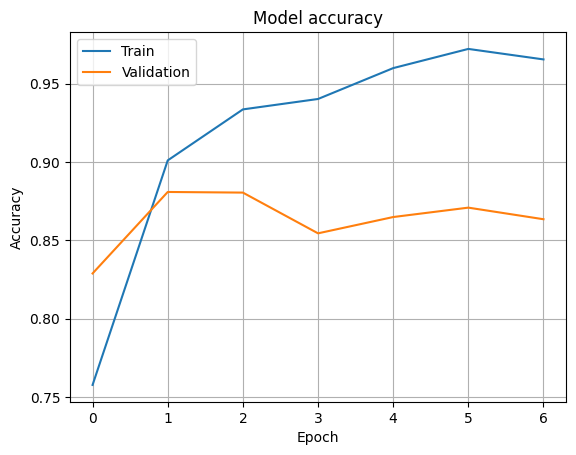

In [10]:
#학습곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

In [11]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf=zipfile.ZipFile('glove.6B.zip')
zf.extractall()
zf.close()

In [13]:
import numpy as np
from scipy.spatial import distance

dictionary={}
f=open('glove.6B.100d.txt', encoding="utf8")
for line in f:
  word_vector=line.split()
  word= word_vector[0]
  #100개의 값을 가지는 array로 변환
  word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
  dictionary[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' % len(dictionary))
print(dictionary['class'])
print('벡터의 차원 수:', len(dictionary['class']))


400000개의 Embedding vector가 있습니다.
[ 0.44507    1.1348     0.33681    0.033357  -1.0405     0.24413
  0.43113    0.041197  -0.81321    1.1462    -0.041166  -0.56681
 -0.37751    0.010833  -0.49384   -0.98461    0.2911     0.62519
  0.0021157  0.076011   0.57661   -0.42666    0.026943  -0.31422
  0.22591   -0.40706   -0.44773   -0.46698    0.071828   0.087351
 -0.25286    1.0292    -0.17695   -0.57001    0.69949    0.49922
 -0.23905    0.21815    0.067587   0.91464   -0.62297   -0.85661
 -0.1409    -0.61247    0.66159    0.090501   0.19563    0.35387
  0.18804    0.30706   -0.73807    0.019089  -0.32798    0.51793
 -0.003088  -1.7927     0.08279   -0.13564    2.0857     0.16076
 -0.41443    0.42641    0.055687   0.03359    0.74283   -0.19547
  0.53011    0.19503    0.44296    0.54503   -0.030984  -0.49682
 -0.11398    0.085998  -0.046392   0.92739    0.088696  -0.28703
 -0.72927   -1.1755    -0.26028   -0.55622   -0.026987  -0.20324
 -0.81465   -0.12299   -1.1006    -1.5845    -0.18962   

In [14]:
#가장 가까운 단어를 찾아주는 함수
def find_closest_words(vector):
  return sorted(dictionary.keys(), key=lambda w: distance.euclidean(dictionary[w],vector))
#가까운단어 찾기
print(find_closest_words(dictionary['movie'])[:5])
print(find_closest_words(dictionary['school'])[:5])
print(find_closest_words(dictionary['oak'])[:5])

#단어추론
print(find_closest_words(dictionary["seoul"]-dictionary["korea"]+dictionary["spain"])[:5])
print(find_closest_words(dictionary["animal"]-dictionary["lion"]+dictionary["oak"])[:5])
print(find_closest_words(dictionary["queen"]-dictionary["king"]+dictionary["actress"])[:5])

['movie', 'film', 'movies', 'films', 'hollywood']
['school', 'college', 'schools', 'elementary', 'students']
['oak', 'pine', 'cedar', 'walnut', 'grove']
['madrid', 'spain', 'santiago', 'seville', 'valencia']
['oak', 'trees', 'woodland', 'wood', 'organic']
['actress', 'actresses', 'dancer', 'actor', 'comedienne']
